In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Activation

In [2]:
X=pd.read_csv("GOOGL.csv")
Y=X.loc[:,['Open','High','Close','Volume']]
from sklearn.preprocessing import MinMaxScaler
# 'feature_range = (0,1)' makes sure that training data is scaled to have values between 0 and 1
sc = MinMaxScaler(feature_range = (0, 1))
X_scaled = sc.fit_transform(Y)

In [3]:
print(X_scaled)

[[0.03803095 0.04355362 0.03520409 1.        ]
 [0.03273064 0.037976   0.03796422 0.3052036 ]
 [0.03834674 0.03841408 0.02749561 0.3540453 ]
 ...
 [0.98308975 1.         1.         0.1595455 ]
 [1.         0.99685944 0.99331725 0.09868731]
 [0.98424771 0.98513655 0.99290702 0.10554736]]


In [4]:
df = pd.DataFrame(X_scaled)
A = df[[0,1,3]]
B = df[[2]]
factor = 0.80
length = A.shape[0]
total_for_train = int(length*factor)
X_train = A[:total_for_train]
Y_train = B[:total_for_train]
X_test = A[total_for_train:]
Y_test = B[total_for_train:]

In [5]:
print("X_train", X_train.shape)
print("y_train", Y_train.shape)
print("X_test", X_test.shape)
print("y_test", Y_test.shape)

X_train (1006, 3)
y_train (1006, 1)
X_test (252, 3)
y_test (252, 1)


In [6]:
classifier = Sequential()
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 3))
classifier.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = [])
classifier.fit(X_train, Y_train, batch_size =128 , epochs = 30, validation_split=0.05)

Epoch 1/30
8/8 [==============================] - 1s 69ms/step - loss: 0.0605 - val_loss: 0.1365
Epoch 2/30
8/8 [==============================] - 0s 8ms/step - loss: 0.0558 - val_loss: 0.1292
Epoch 3/30
8/8 [==============================] - 0s 7ms/step - loss: 0.0531 - val_loss: 0.1207
Epoch 4/30
8/8 [==============================] - 0s 8ms/step - loss: 0.0465 - val_loss: 0.1107
Epoch 5/30
8/8 [==============================] - 0s 8ms/step - loss: 0.0425 - val_loss: 0.0985
Epoch 6/30
8/8 [==============================] - 0s 8ms/step - loss: 0.0360 - val_loss: 0.0839
Epoch 7/30
8/8 [==============================] - 0s 7ms/step - loss: 0.0291 - val_loss: 0.0671
Epoch 8/30
8/8 [==============================] - 0s 7ms/step - loss: 0.0209 - val_loss: 0.0496
Epoch 9/30
8/8 [==============================] - 0s 8ms/step - loss: 0.0147 - val_loss: 0.0332
Epoch 10/30
8/8 [==============================] - 0s 7ms/step - loss: 0.0105 - val_loss: 0.0213
Epoch 11/30
8/8 [=====================

In [7]:
predictions = classifier.predict(X_test)
print(predictions[:10])

[[0.33111477]
 [0.3446958 ]
 [0.33825326]
 [0.34825814]
 [0.32533318]
 [0.3464809 ]
 [0.3662219 ]
 [0.36775208]
 [0.36465555]
 [0.37915033]]


In [8]:
trainScore = classifier.evaluate(X_train, Y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = classifier.evaluate(X_test, Y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00 MSE (0.02 RMSE)
Test Score: 0.02 MSE (0.12 RMSE)


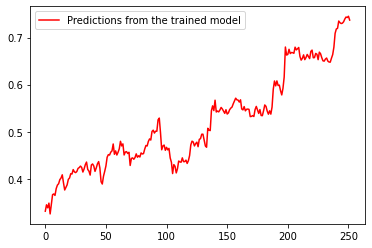

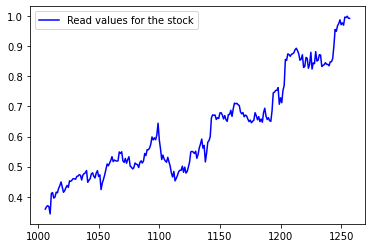

In [9]:
import matplotlib.pyplot as plt
plt.plot(predictions,color='red', label='Predictions from the trained model')
plt.legend(loc='upper left')
plt.show()
plt.plot(Y_test,color='blue', label='Read values for the stock')
plt.legend(loc='upper left')
plt.show()